In [205]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [42]:
from IPython.core.display import HTML

In [43]:
#reading csv of known data in to pandas
doc_concepts = pd.DataFrame.from_csv('../../data/cirp_concepts_unwind.csv', index_col=None)
doc_concepts.head()

,_id,event_short_name,event_year,title,abstract,concept,concept_relevance
0,CIRP_20080101_2008-57-1-0001-A,CIRP,2008,Assessment of products for optimal lifetime,Sustainable manufacturing requires products to...,Engineering,0.853031
1,CIRP_20080101_2008-57-1-0001-A,CIRP,2008,Assessment of products for optimal lifetime,Sustainable manufacturing requires products to...,Technology,0.790793
2,CIRP_20080101_2008-57-1-0001-A,CIRP,2008,Assessment of products for optimal lifetime,Sustainable manufacturing requires products to...,Industrial design,0.747593
3,CIRP_20080101_2008-57-1-0001-A,CIRP,2008,Assessment of products for optimal lifetime,Sustainable manufacturing requires products to...,Katharine McPhee,0.704206
4,CIRP_20080101_2008-57-1-0001-A,CIRP,2008,Assessment of products for optimal lifetime,Sustainable manufacturing requires products to...,Science,0.658686


In [107]:
#####NUMBER OF UNIQUE DOCUMENTS
dc = doc_concepts
dc._id.nunique()
print('Number of documents:',dc._id.nunique())
print('Total Concepts:', len(dc))
print('Unique Concepts:', dc.concept.nunique())


Number of documents: 1205
Total Concepts: 8985
Unique Concepts: 2220


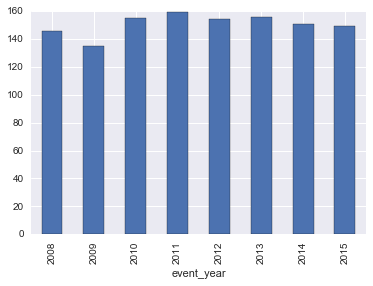

In [45]:
docs = dc.groupby(['event_year'])['_id'].nunique()
docs.plot(kind='bar')

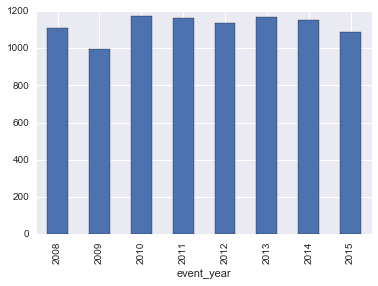

In [46]:
cpts = dc.groupby(['event_year'])['concept'].size()
cpts.plot(kind='bar')

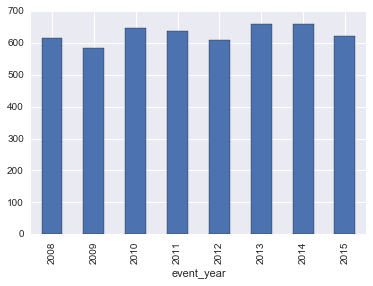

In [47]:
#####NUMBER OF UNIQUE CONCEPTS BY YEAR
u_cpts = dc.groupby(['event_year'])['concept'].nunique()
u_cpts.plot(kind='bar')

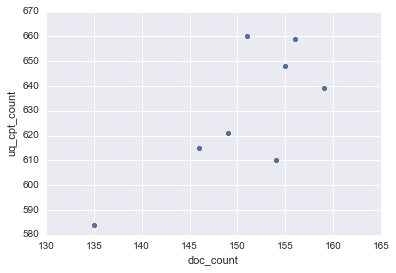

In [48]:
##plot a scatter graph to understand the correlation between number of documents and unique concepts
##it appears that the more documents result in more unique concepts - DOESNT HOLD TRUE
sc_f = pd.DataFrame({'year':docs.index, 'doc_count': docs.values, 'uq_cpt_count':u_cpts.values})
sc_f.plot(kind='scatter', y='uq_cpt_count', x='doc_count')

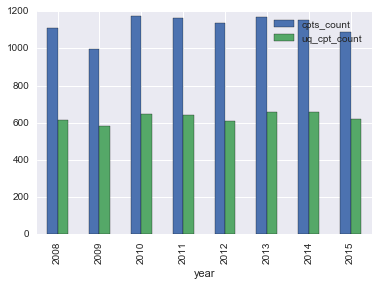

In [83]:
##bar chart of comparison of concepts to unique concepts by year
bc_f = pd.DataFrame({'year':cpts.index, 'cpts_count': cpts.values, 'uq_cpt_count':u_cpts.values})
bc_f.plot(kind='bar', x='year')

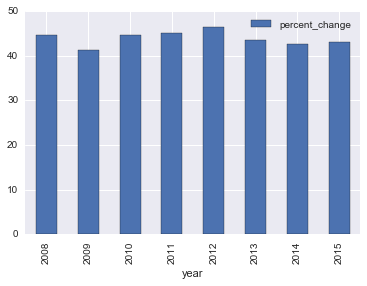

In [84]:
##bar chart of percent difference of concept count, unique concept count by year::
bc_f['percent_change'] = (((bc_f.cpts_count - bc_f.uq_cpt_count))/bc_f.cpts_count) * 100
bc_f.plot(kind='bar', x='year', y='percent_change')

In [50]:
print("relevance mean:", dc['concept_relevance'].mean())
print("relevance median:", dc['concept_relevance'].median())

relevance mean: 0.6770014888146936
relevance median: 0.6619470000000001


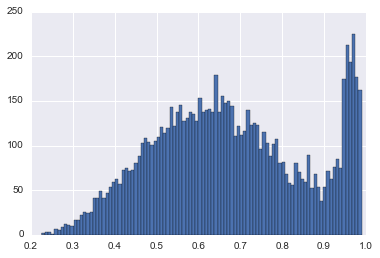

In [86]:
###
### Plot a chart by relevance
###
dc.concept_relevance.hist(bins=100)

In [52]:
#######
###### CUT OFF THE RELEVANCE AT 0.9 to draw sample concepts
######

In [110]:
###adding relevance cutoff of 0.9
dcrel = doc_concepts
dcrel = dcrel[dcrel.concept_relevance >= 0.9]
dcrel._id.nunique()

#####NUMBER OF UNIQUE CONCEPTS
dcrel.concept.nunique()
print('Number of documents:',dcrel._id.nunique())
print('Total Concepts:', len(dcrel))
print('Unique Concepts:', dcrel.concept.nunique())


Number of documents: 1188
Total Concepts: 1553
Unique Concepts: 531


In [130]:
sample_concepts = dcrel.sample(10).concept.as_matrix()
sample_concepts

array(['Fluid dynamics', 'Temperature', 'Measurement', 'Milling cutter',
       'Computer-aided design', 'Welding', 'Simulation',
       'Kanagawa Prefecture', 'Social network', 'Uncertainty'], dtype=object)

In [209]:
#dcrel.head(600).pivot('_id','concept','concept_relevance')
dc.head(2)

,_id,event_short_name,event_year,title,abstract,concept,concept_relevance
0,CIRP_20080101_2008-57-1-0001-A,CIRP,2008,Assessment of products for optimal lifetime,Sustainable manufacturing requires products to...,Engineering,0.853031
1,CIRP_20080101_2008-57-1-0001-A,CIRP,2008,Assessment of products for optimal lifetime,Sustainable manufacturing requires products to...,Technology,0.790793


In [600]:
"""Fuction definitions"""
def drawSampleConcepts(obj):
    """Drawing a sample"""
    return obj.sample(10).concept.as_matrix().tolist()

def filterData(dfObj, listOfConcepts):
    """filter data"""
    ##Filter the known data frame with above sample concept array
    fs = dfObj[dfObj.concept.isin(listOfConcepts)].groupby(['event_year', 'concept']).size()   
    yr =[]
    concept=[]
    ct=[]
    for i in fs.iteritems():
        yr.append(i[0][0])
        concept.append(i[0][1])
        ct.append(i[1])
    return pd.DataFrame({'year':yr, 'concept':concept, 'ct':ct})    

def plotHeatMap(filteredData):
    """plotting heat map"""
    sns.heatmap(filteredData.pivot('concept','year').fillna(0))
    
def plotPairGrid(filteredData):
    filteredData = filteredf
    """plotting pair grid"""
    pivoted_df = filteredData.pivot('concept','year').fillna(0)
    cols = pivoted_df.ct.columns.tolist()
    cols.append('concept')
    
    idx_vals = pivoted_df.ct.index.values.tolist()
    rows = pivoted_df.ct.values.tolist()

    idx=0
    for r in rows:
        r.append(idx_vals[idx])
        idx+=1        
    f =  pd.DataFrame(rows, columns=cols)
    # Make the PairGrid
    g = sns.PairGrid(f,
                     x_vars=f.columns[0:8], y_vars=["concept"],
                     size=10, aspect=.5)

    # Draw a dot plot using the stripplot function
    g.map(sns.stripplot, size=10, orient="h",
          palette="Reds_r", edgecolor="gray")

    # Use the same x axis limits on all columns and add better labels
    g.set(xlim=(0, 25), xlabel="Count", ylabel="")

    # Use semantically meaningful titles for the columns
    titles = ["2008", "2009", "2010",
              "2011", "2012", "2013","2014","2015"]

    for ax, title in zip(g.axes.flat, titles):

        # Set a different title for each axes
        ax.set(title=title)

        # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    sns.despine(left=True, bottom=True)

sample 1


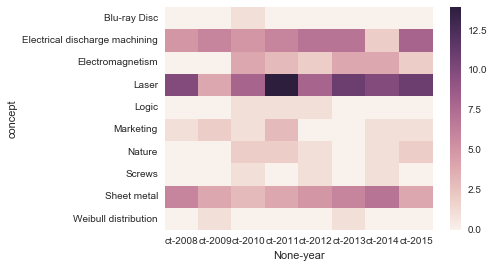

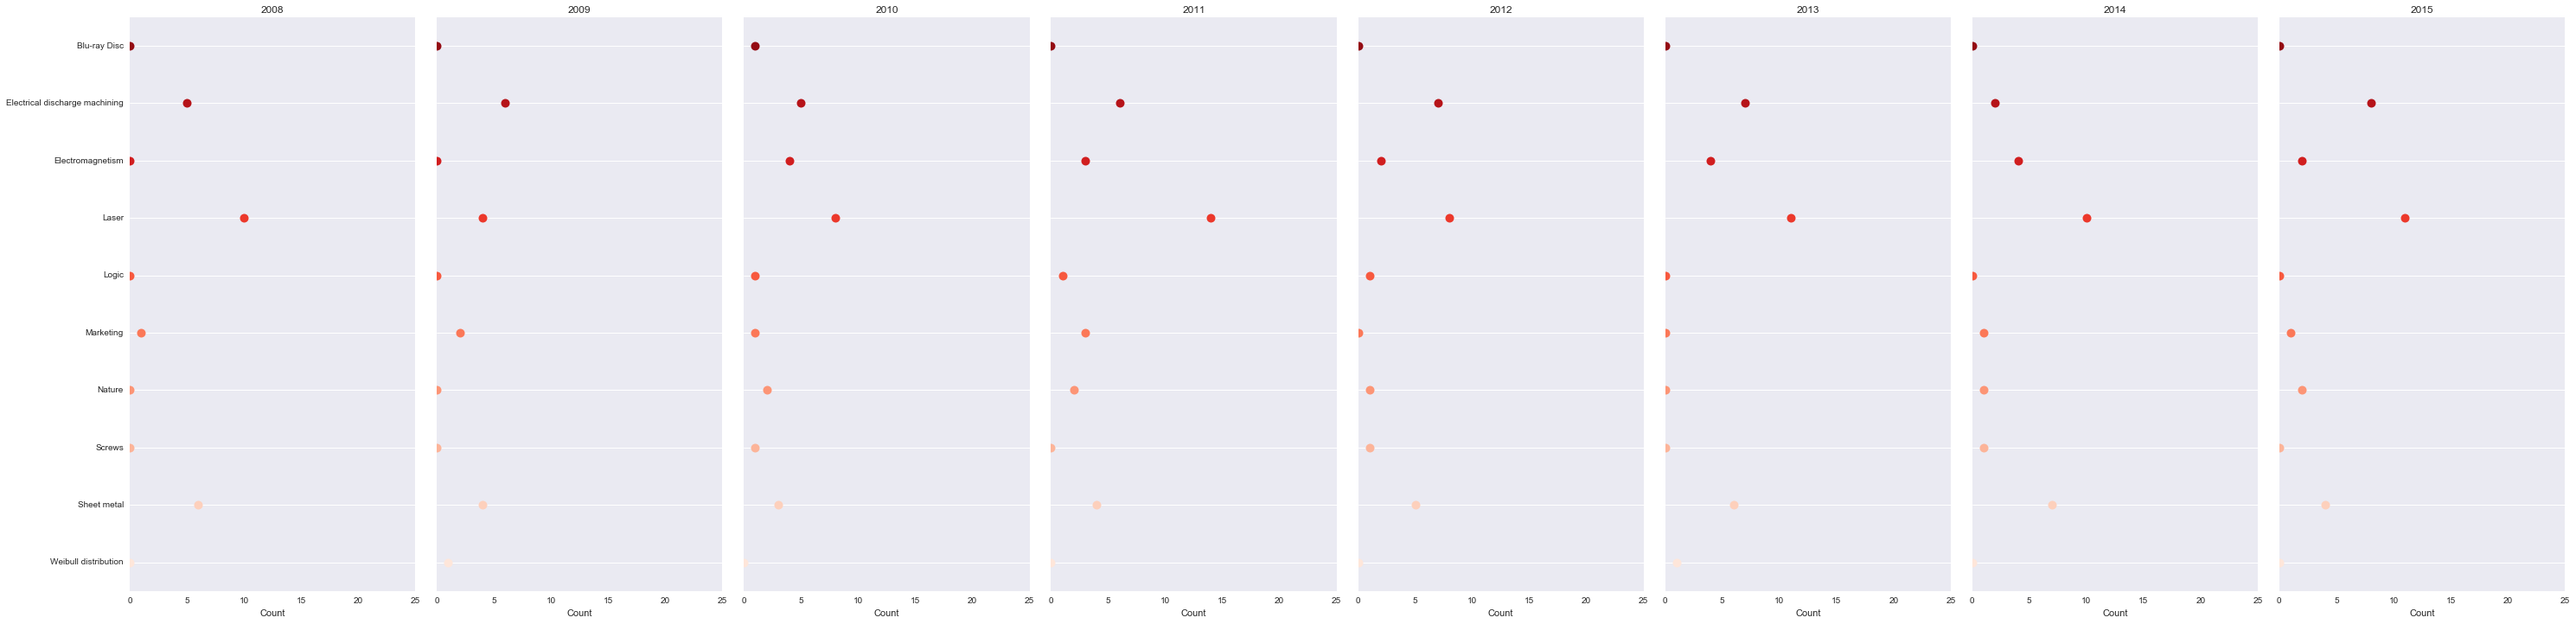

In [601]:
print("sample 1")
concept_sample1 = drawSampleConcepts(dcrel)    
filteredf = filterData(doc_concepts,concept_sample1)
plotHeatMap(filteredf)
plotPairGrid(filteredf)

sample 2


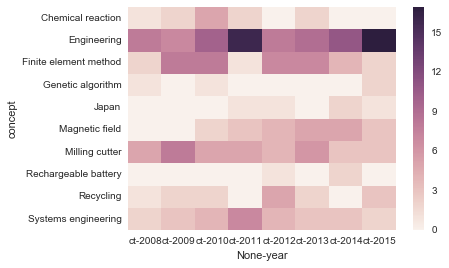

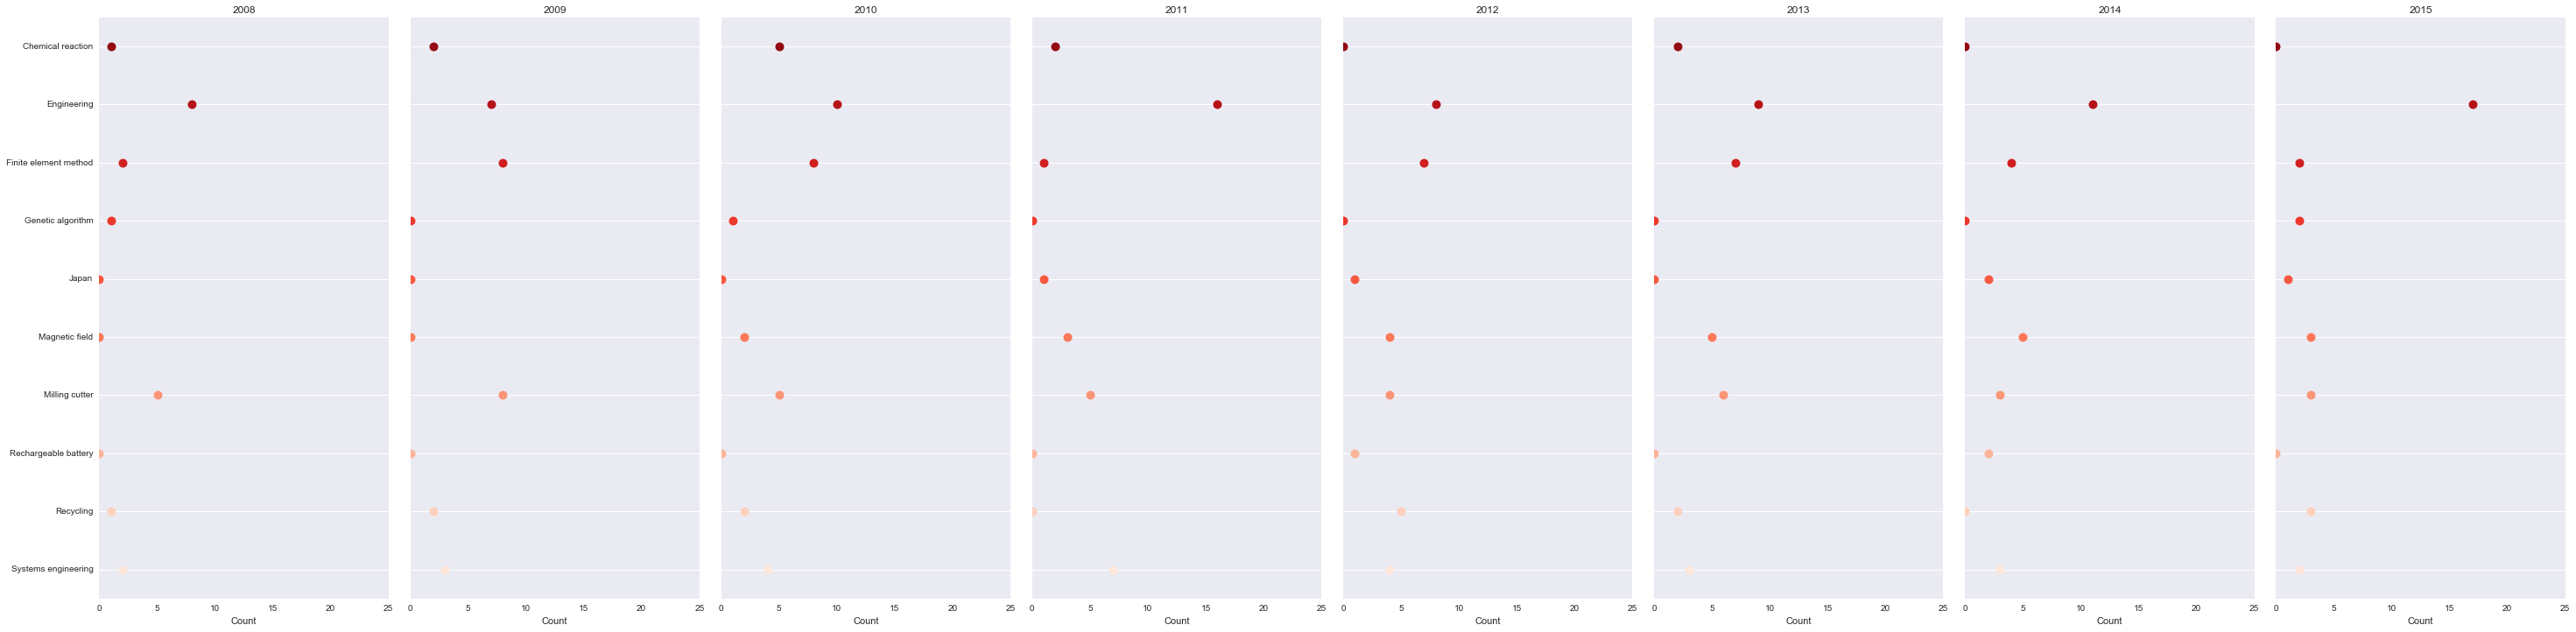

In [602]:
print("sample 2")
concept_sample2 = drawSampleConcepts(dcrel)    
filteredf = filterData(doc_concepts,concept_sample2)
plotHeatMap(filteredf)
plotPairGrid(filteredf)